# Importing Datas and Libraries

In [116]:
import tweepy as tw
import csv
import pandas as pd
from collections import Counter
import nltk
from nltk import ngrams
from nltk.tokenize import WordPunctTokenizer

In [90]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [91]:
df_the_book_thief_ok = pd.read_csv(
    '/content/gdrive/MyDrive/the_book_thief_ok.csv')

In [92]:
df_the_book_thief_ok.shape
df_the_book_thief_ok.info
df = df_the_book_thief_ok

# processing the cleaning of all tweets like pseudo, url, emoji...

In [93]:
!pip install tweet-preprocessor

In [94]:
import preprocessor as p

In [95]:
p.set_options(p.OPT.URL, p.OPT.EMOJI, p.OPT.HASHTAG, p.OPT.SMILEY, p.OPT.NUMBER)

In [96]:
df

,Unnamed: 0,tweets
0,0,@nineeetynine @ao3org Hi! Thank you for unders...
1,1,"@Katstodian_ @CatLebowski Jeg mener, at jeg bl..."
2,2,@LibrarylinM The book thief I guess
3,3,"At this weekend, I plan to watch Crime Dramas ..."
4,4,Asking what's favourite book to book dragon is...
...,...,...
808,808,@A_DiAngelo @AuthorJMills Immortals guard us w...
809,809,@dragonwriterca The Book Thief maybe - Such an...
810,810,Cyber-Thief Invention (Part 1) is the highest ...
811,811,"Works Of Me In A Movie That Is Nice Oh, It's C..."


In [97]:
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt
import re
plt.style.use('seaborn-whitegrid')

In [98]:
for i in range(df['tweets'].shape[0]):
  df['tweets'][i] = p.clean(df['tweets'][i])
  df['tweets'][i] = re.sub(r'@[A-Za-z0-9]+','',df['tweets'][i])  
  df['tweets'][i] = df['tweets'][i].replace("_", " ")
  df['tweets'][i] = df['tweets'][i].replace("-", " ")
  df['tweets'][i] = df['tweets'][i].replace("!", "")
  df['tweets'][i] = df['tweets'][i].replace('|', " ")
  df['tweets'][i] = df['tweets'][i].replace('(', " ")
  df['tweets'][i] = df['tweets'][i].replace(')', " ")
  df['tweets'][i] = df['tweets'][i].lower()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

In [99]:
df


,Unnamed: 0,tweets
0,0,hi thank you for understanding. if you can b...
1,1,"jeg mener, at jeg bl.a. anbefalede ""the boo..."
2,2,the book thief i guess
3,3,"at this weekend, i plan to watch crime dramas ..."
4,4,asking what's favourite book to book dragon is...
...,...,...
808,808,diangelo immortals guard us when we dream. d...
809,809,the book thief maybe such an incredible boo...
810,810,cyber thief invention part is the highest s...
811,811,"works of me in a movie that is nice oh, it's c..."


In [100]:
for i in range(df['tweets'].shape[0]):
  df['tweets'][i] = df['tweets'][i].replace('/', " ")
  df['tweets'][i] = df['tweets'][i].replace('.', " ")
  df['tweets'][i] = df['tweets'][i].replace('?', " ")
  df['tweets'][i] = df['tweets'][i].replace('"', " ")
  df['tweets'][i] = df['tweets'][i].replace('*', " ")
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

# Making big string and list of word

In [104]:
all_words = ''
for i in range(df['tweets'].shape[0]):
  all_words = all_words + df['tweets'][i]

In [105]:
list_words = all_words.split(' ')

# Removing the Stop Words and some common and useless words for sentiment analysis

In [109]:
word_counts = Counter(list_words)
for w in word_counts.most_common(9):
    print(f"{w[0]}:  \t{w[1]} ")

:  	2072 
the:  	1504 
book:  	848 
thief:  	595 
and:  	471 
of:  	459 
a:  	447 
to:  	422 
i:  	408 


In [110]:
# Cleaning
list_words_without_stopword = [ word for word in list_words if word not in list(WordCloud().stopwords) ]
my_stopwords = ['book', 'the', 'and', 'of','a','to','i','thief','cyber','weekend', 'markus', 'zusak']
list_words__without_stopword_final = [ word for word in list_words_without_stopword if word not in my_stopwords ]                                                      

In [111]:
# Verification
word_counts = Counter(list_words__without_stopword_final)
for w in word_counts.most_common(9):
    print(f"{w[0]}:  \t{w[1]} ")

:  	2072 
plan:  	186 
part:  	132 
selling:  	127 
read:  	125 
highest:  	125 
invention:  	124 
will:  	98 
,:  	80 


In [112]:
all_words = " ".join([tweets for tweets in list_words__without_stopword_final])

In [ ]:
wordcloud = WordCloud(background_color='white', width=500, height=300, random_state= 55, max_font_size=500 , max_words= 100).generate(all_words)

# Wordcloud

In [113]:
wordcloud = WordCloud(
    background_color = 'white', width=300, height=200, random_state= 55, max_font_size=300 , max_words= 100
    ).generate(all_words)

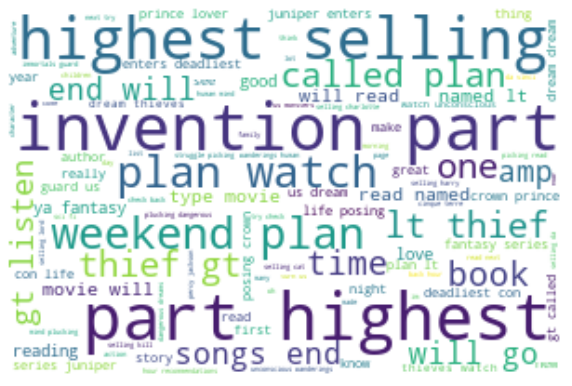

In [114]:
plt.figure(figsize = (10, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# bigrammes

In [117]:
# Tokenize
tokens = WordPunctTokenizer().tokenize(all_words)
bigrams = [w for w in  ngrams(tokens,n=2)]
print(bigrams)

[('hi', 'thank'), ('thank', 'understanding'), ('understanding', 'buy'), ('buy', 'ebooks'), ('ebooks', 'amazon'), ('amazon', ','), (',', 'find'), ('find', 'plagiarized'), ('plagiarized', 'others'), ('others', 'otherwise'), ('otherwise', ','), (',', 'reach'), ('reach', 'dm'), ('dm', 'discuss'), ('discuss', 'amz'), ('amz', 'universal'), ('universal', ':'), (':', 'amz'), ('amz', 'us'), ('us', ':'), (':', 'jeg'), ('jeg', 'mener'), ('mener', ','), (',', 'jeg'), ('jeg', 'bl'), ('bl', 'anbefalede'), ('anbefalede', ','), (',', 'gargoyle'), ('gargoyle', 'andrew'), ('andrew', 'davidson'), ('davidson', ','), (',', 'curious'), ('curious', 'incident'), ('incident', 'dog'), ('dog', 'night'), ('night', 'time'), ('time', 'mark'), ('mark', 'haddon'), ('haddon', 'og'), ('og', 'martian'), ('martian', 'andy'), ('andy', 'weir'), ('weir', 'alle'), ('alle', 'fire'), ('fire', 'er'), ('er', 'helt'), ('helt', 'vidunderlige'), ('vidunderlige', 'guessat'), ('guessat', 'weekend'), ('weekend', ','), (',', 'plan'), (

# trigrammes

In [118]:
trigrams = ['_'.join(w) for w in  ngrams(tokens,n=3)]
print(trigrams)

['hi_thank_understanding', 'thank_understanding_buy', 'understanding_buy_ebooks', 'buy_ebooks_amazon', 'ebooks_amazon_,', 'amazon_,_find', ',_find_plagiarized', 'find_plagiarized_others', 'plagiarized_others_otherwise', 'others_otherwise_,', 'otherwise_,_reach', ',_reach_dm', 'reach_dm_discuss', 'dm_discuss_amz', 'discuss_amz_universal', 'amz_universal_:', 'universal_:_amz', ':_amz_us', 'amz_us_:', 'us_:_jeg', ':_jeg_mener', 'jeg_mener_,', 'mener_,_jeg', ',_jeg_bl', 'jeg_bl_anbefalede', 'bl_anbefalede_,', 'anbefalede_,_gargoyle', ',_gargoyle_andrew', 'gargoyle_andrew_davidson', 'andrew_davidson_,', 'davidson_,_curious', ',_curious_incident', 'curious_incident_dog', 'incident_dog_night', 'dog_night_time', 'night_time_mark', 'time_mark_haddon', 'mark_haddon_og', 'haddon_og_martian', 'og_martian_andy', 'martian_andy_weir', 'andy_weir_alle', 'weir_alle_fire', 'alle_fire_er', 'fire_er_helt', 'er_helt_vidunderlige', 'helt_vidunderlige_guessat', 'vidunderlige_guessat_weekend', 'guessat_weeken